In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv("../data/raw/KaggleV2-May-2016.csv")

df["ScheduledDT"] = pd.to_datetime(df["ScheduledDay"].astype(str).replace("Z","", regex=False), errors="coerce")
df["AppointmentDT"] = pd.to_datetime(df["AppointmentDay"].astype(str).replace("Z","", regex=False), errors="coerce")
df["NoShow"] = (df["No-show"] == "Yes")

print("Data shape:", df.shape)
print(df[["SMS_received", "NoShow"]].head())

Data shape: (110527, 17)
   SMS_received  NoShow
0             0   False
1             0   False
2             0   False
3             0   False
4             0   False


In [2]:
sms_summary = (
    df.groupby("SMS_received")
    .agg(Appointments = ("NoShow", "size"),
         NoShows = ("NoShow", "sum"))
    .assign(NoShowRate = lambda t: t["NoShows"]/t["Appointments"])
    .reset_index()
)

sms_summary["SMS_received"] = sms_summary["SMS_received"].map({0:"No SMS", 1:"SMS Sent"})
print(sms_summary)

  SMS_received  Appointments  NoShows  NoShowRate
0       No SMS         75045    12535    0.167033
1     SMS Sent         35482     9784    0.275745


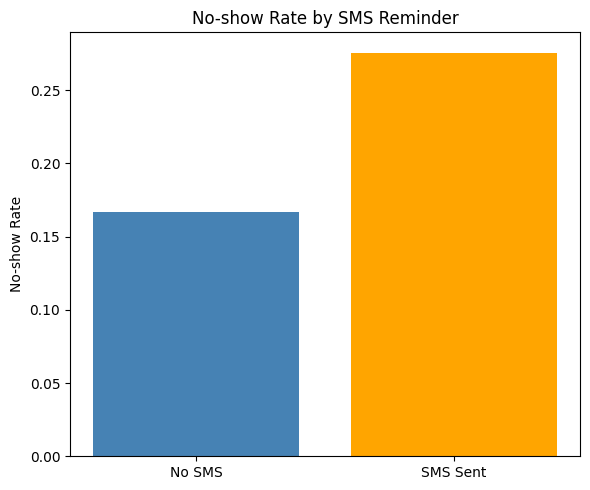

In [3]:
plt.figure(figsize=(6,5))
plt.bar(sms_summary["SMS_received"], sms_summary["NoShowRate"], color=["steelblue", "orange"])
plt.title("No-show Rate by SMS Reminder")
plt.ylabel("No-show Rate")
plt.tight_layout()

os.makedirs("../assets", exist_ok=True)
plt.savefig("../assets/no_show_rate_by_sms.png", dpi=150)
plt.show()

In [5]:
os.makedirs("../data/processed", exist_ok=True)
sms_summary.to_csv("../data/processed/sms_noshow_summary.csv", index=False)
print("Saved sms_noshow_summary.csv")

Saved sms_noshow_summary.csv


In [8]:
bins = [0, 12, 18, 30, 45, 60, 100]
labels = ["Child (0-12)", "Teen (13-18)", "Young Adult (19-30)", "Adult (31-45)", "Middle Age (46-60)", "Senior (60+)"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

In [12]:
age_sms_summary = (
    df.groupby(["AgeGroup", "SMS_received"], observed=False)
    .agg(Appointments=("NoShow", "size"),
         NoShows=("NoShow","sum"))
    .assign(NoShowRate= lambda t: t["NoShows"]/t["Appointments"])
    .reset_index()
)

age_sms_summary["SMS_received"] = age_sms_summary["SMS_received"].map({0:"No SMS", 1:"SMS Sent"})
print(age_sms_summary)

               AgeGroup SMS_received  Appointments  NoShows  NoShowRate
0          Child (0-12)       No SMS         12229     2111    0.172622
1          Child (0-12)     SMS Sent          5268     1557    0.295558
2          Teen (13-18)       No SMS          5546     1230    0.221781
3          Teen (13-18)     SMS Sent          2284      810    0.354641
4   Young Adult (19-30)       No SMS         10935     2084    0.190581
5   Young Adult (19-30)     SMS Sent          5830     2059    0.353173
6         Adult (31-45)       No SMS         14636     2497    0.170607
7         Adult (31-45)     SMS Sent          7318     2195    0.299945
8    Middle Age (46-60)       No SMS         15426     2363    0.153183
9    Middle Age (46-60)     SMS Sent          7753     1768    0.228041
10         Senior (60+)       No SMS         13624     1824    0.133881
11         Senior (60+)     SMS Sent          6131     1179    0.192301


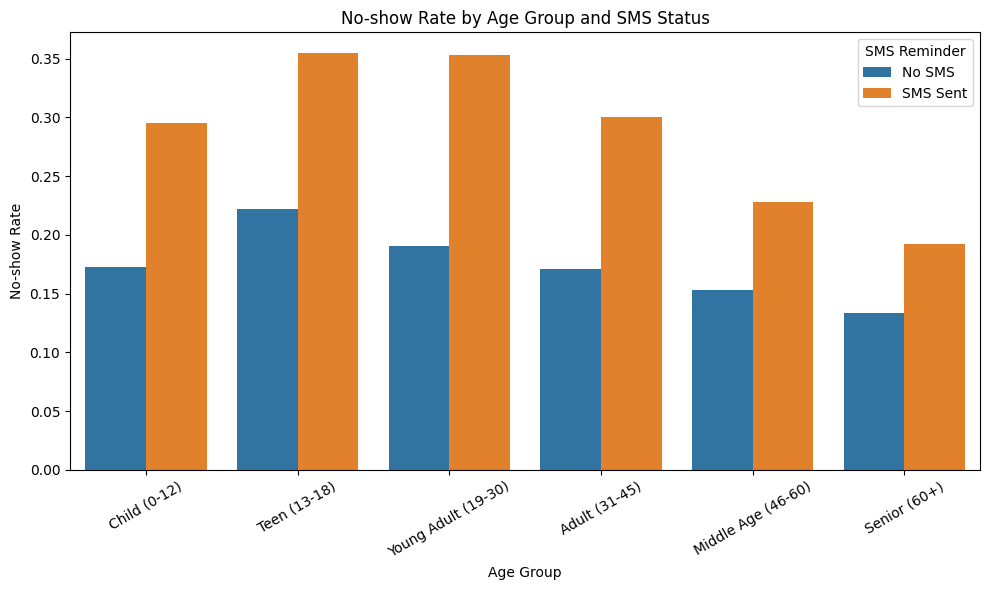

In [13]:
import seaborn as sns
plt.figure(figsize= (10,6))
sns.barplot(data=age_sms_summary, x="AgeGroup", y="NoShowRate", hue="SMS_received")
plt.title("No-show Rate by Age Group and SMS Status")
plt.xlabel("Age Group")
plt.ylabel("No-show Rate")
plt.legend(title="SMS Reminder")
plt.xticks(rotation=30)
plt.tight_layout()

plt.savefig("../assets/no_show_rate_by_age_sms.png", dpi=150)
plt.show()

In [14]:
os.makedirs("../data/processed", exist_ok=True)
age_sms_summary.to_csv("../data/processed/age_sms_summary.csv", index=False)
print("Saved age_sms_summary.csv")

Saved age_sms_summary.csv
